# Grover's Algorithm Simulation for DNA Pattern Matching
**Author**: Andrew Sullivan  
**Course**: CNT 4504  
**Instructor**: Professor Kelly  
**Date**: April 5, 2024

This project is a small simulation that supports the essay titled:  
**"Hybrid Quantum Encoding: Combining Amplitude and Basis Encoding for Enhanced Data Storage and Processing in Quantum Computing"**

It demonstrates the use of Grover's Algorithm to search for a DNA base (encoded in binary) using basis encoding and Cirq, an open-source Python framework developed by Google for building, simulating, and executing quantum circuits on quantum computers, especially those based on quantum gates.


In [1]:
!pip install cirq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 49.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 597.5/597.5 kB 35.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 425.1/425.1 kB 22.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 41.4 MB/s eta 0:00:00


In [3]:
import cirq
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

In [4]:
def grover_oracle(qubits):
    circuit = cirq.Circuit()

    # Target: "101" → qubit[0] = 1, qubit[1] = 0, qubit[2] = 1
    # Flip the qubits where the bit is 0 so that we can use a CCZ gate
    circuit.append(cirq.X(qubits[1]))

    # Apply controlled-Z to mark the target state
    circuit.append(cirq.CCZ(qubits[0], qubits[1], qubits[2]))

    # Undo the X gate
    circuit.append(cirq.X(qubits[1]))

    return circuit


In [5]:
def diffusion_operator(qubits):
    circuit = cirq.Circuit()

    circuit.append(cirq.H.on_each(*qubits))
    circuit.append(cirq.X.on_each(*qubits))

    # Apply multi-controlled Z (inverted again with X)
    circuit.append(cirq.H(qubits[2]))
    circuit.append(cirq.CCX(qubits[0], qubits[1], qubits[2]))
    circuit.append(cirq.H(qubits[2]))

    circuit.append(cirq.X.on_each(*qubits))
    circuit.append(cirq.H.on_each(*qubits))

    return circuit


In [6]:
# Define 3 qubits
qubits = cirq.LineQubit.range(3)

# Create circuit
circuit = cirq.Circuit()

# Step 1: Superposition
circuit.append(cirq.H.on_each(*qubits))

# Step 2: Oracle and Diffusion (Grover iteration)
circuit += grover_oracle(qubits)
circuit += diffusion_operator(qubits)

# Step 3: Measure
circuit.append(cirq.measure(*qubits, key='result'))

# Display the circuit
print(circuit)


0: ───H───────@───────H───X───────@───X───H───────M('result')───
              │                   │               │
1: ───H───X───@───X───H───X───────@───X───H───────M─────────────
              │                   │               │
2: ───H───────@───────H───X───H───X───H───X───H───M─────────────


In [7]:
simulator = cirq.Simulator()
result = simulator.run(circuit, repetitions=1000)
counts = Counter([tuple(out) for out in result.measurements['result']])

# Convert counts to strings for plotting
formatted = {"".join(map(str, reversed(k))): v for k, v in counts.items()}
print("Measurement Results:", formatted)

Measurement Results: {'101': 786, '011': 31, '110': 28, '010': 33, '001': 37, '000': 26, '100': 28, '111': 31}


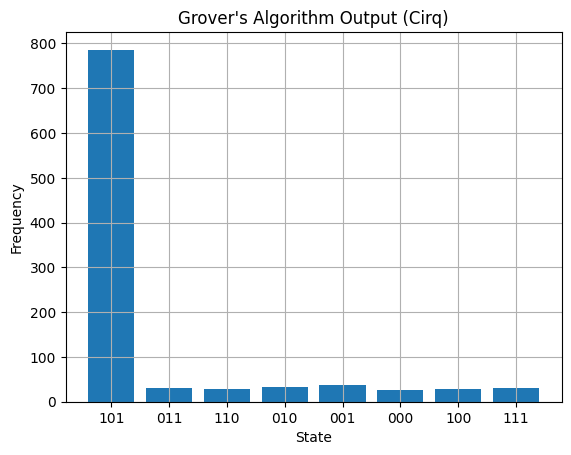

In [8]:
plt.bar(formatted.keys(), formatted.values())
plt.xlabel("State")
plt.ylabel("Frequency")
plt.title("Grover's Algorithm Output (Cirq)")
plt.grid(True)
plt.show()


## Reflection

This project helped me understand the practical application of Grover’s Algorithm in the context of quantum encoding.  
By using basis encoding and running a simulated quantum search, I observed how efficiently quantum algorithms can find patterns in unstructured data such as DNA.

This supports the ideas in the article I reviewed, where the authors used hybrid encoding techniques and Grover’s algorithm to optimize pattern matching on quantum systems.
